# Motivation

How Switzerland is handling COVID ? It seems pretty bad these days. Compared to the first wave where we were supposed to be among the best. 

But is it really the case or is there a mathematical tricks hidden behind that ? 
One idea is that when comparing countries (Switzerland, France, US) we often look at the nb of case per 100k habitants. But is it fair ? 

This notebook will try to study that fact 

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57821,NaN,NaN,International,2020-11-15,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57822,NaN,NaN,International,2020-11-16,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57823,NaN,NaN,International,2020-11-17,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57824,NaN,NaN,International,2020-11-18,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
total_cases = dict(df.groupby("location").last()["new_cases_per_million"].dropna())
population = dict(df.groupby("location").max()["population"])
sorted_case = np.array([v for k,v in sorted(total_cases.items(),key =lambda item : item[1])])

sorted_population = np.array([population[k] for k,v in sorted(total_cases.items(),key =lambda item : item[1])])


sorted_name = np.array([k for k,v in sorted(total_cases.items(),key =lambda item : item[1])])


for k,v in sorted(total_cases.items(),key =lambda item : item[1])[-30:]:
    print(k,"{:.2f}".format(v))

    
print("______")
print("World : {:.2f}".format(total_cases["World"]))

Moldova 398.37
Curacao 408.29
France 434.83
Belgium 444.45
Hungary 467.06
Bosnia and Herzegovina 497.74
Armenia 512.95
United States 513.61
Czech Republic 514.99
Poland 525.36
Romania 533.80
Bulgaria 566.75
Italy 566.97
Portugal 577.74
Guam 663.57
Macedonia 672.95
Luxembourg 678.94
Switzerland 703.09
Lithuania 710.43
Jordan 777.51
Croatia 791.91
Serbia 824.88
Austria 862.28
Georgia 863.09
Andorra 867.15
Slovenia 975.02
Montenegro 1017.41
Liechtenstein 1284.84
French Polynesia 1658.93
San Marino 2003.65
______
World : 77.58


[(55911, 56294), (0, 19102), (33271, 36043), (40033, 41601), (0, 21754), (29578, 33314), (51218, 51802), (53791, 54255), (44206, 45296), (34022, 36628), (44968, 45988), (13502, 25249), (36958, 38997), (3857, 23656), (0, 14281), (34212, 36777), (39709, 41322), (40193, 41740), (54664, 55092), (9019, 24267), (12372, 24953), (38982, 40698), (48283, 49043), (15767, 25949), (46540, 47428), (54025, 54479), (52286, 52817), (9991, 24438), (43988, 45100), (0, 15288), (54697, 55124), (26603, 31316), (46008, 46939), (9351, 24323), (7212, 24001), (18725, 27087), (24632, 30105), (17458, 26568), (32533, 35478), (50935, 51535), (48971, 49686), (56569, 56929), (58274, 58582), (36582, 38686), (27129, 31655), (0, 11326), (0, 18047), (31634, 34803), (75673, 75735), (53189, 53678), (59131, 59416), (60959, 61200), (53279, 53764), (51969, 52516), (47710, 48510), (54437, 54874), (44197, 45288), (51119, 51709), (60502, 60753), (47061, 47909), (53568, 54041), (45301, 46291), (52463, 52986), (49311, 50004), (512

(7911, 79.11079110791108)

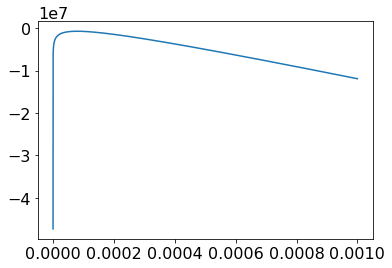

In [77]:
import scipy.special as sc

new_case = dict(df.groupby("location").last()["new_cases"].dropna())
sorted_new_case = np.array([new_case[k] for k,v in sorted(total_cases.items(),key =lambda item : item[1])])


def loglikelihood(lamb, y, N):
    return np.array([(y*np.log(l*N)-l*N - sc.gammaln(y+1) ).sum() for l in lamb])


def loglikelihood_y(lamb, y, N):
    return y*np.log(lamb*N)-lamb*N - sc.gammaln(y+1)


def filter_at_val(arr, val):
    mask = arr > (arr.max()-val)
    idx = np.arange(len(arr))
    return idx[mask][0], idx[mask][-1]


lamb = np.linspace(1e-21, 1e-3, 1e5)

val = 1.92

lgli = loglikelihood(lamb, sorted_new_case,sorted_population)

max_lamb = lamb[np.argmax(lgli)]

y_th = np.logspace(-1, 7, 1e5)    

idx = [filter_at_val(loglikelihood_y(max_lamb, y_th, n), 1.92) for n in sorted_population]

low = [y_th[c[0]] for c in idx]
high = [y_th[c[1]] for c in idx]
print(idx)


print(filter_at_val(lgli, 1.92))

plt.plot(lamb, lgli)


np.argmax(lgli), lamb[np.argmax(lgli)]*1e6

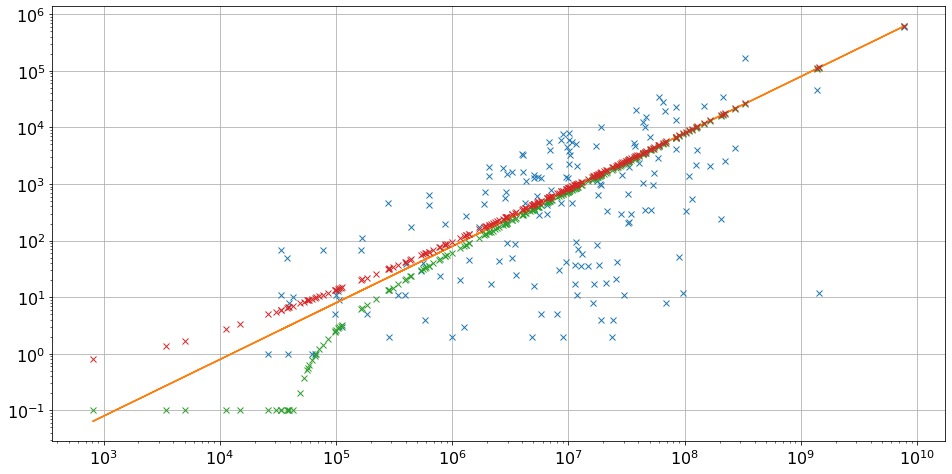

In [114]:
plt.figure(figsize=(16,8))

plt.loglog(sorted_population, sorted_new_case, 'x')

plt.loglog(sorted_population, lamb[np.argmax(lgli)]*sorted_population)
plt.loglog(sorted_population, np.array(low), 'x')
plt.loglog(sorted_population, np.array(high), 'x')
plt.grid()

'China'

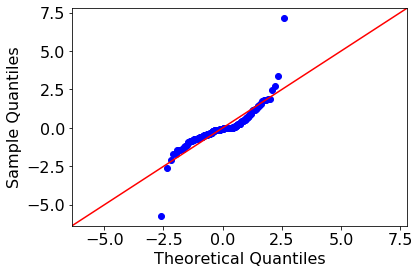

In [113]:
from scipy.special import xlogy

orange_line = lamb[np.argmax(lgli)]*sorted_population

res = orange_line - sorted_new_case

sq_res = ((res**2)/orange_line).sum()

nrm_res = np.sqrt(2) * np.sign(sorted_new_case-orange_line) * np.sqrt(xlogy(sorted_new_case, sorted_new_case/orange_line) - (sorted_new_case-orange_line))/np.sqrt(sq_res)



sm.qqplot(nrm_res, fit=True, line="45")

sorted_name[np.argmin(nrm_res)]

7.75739813436e-05


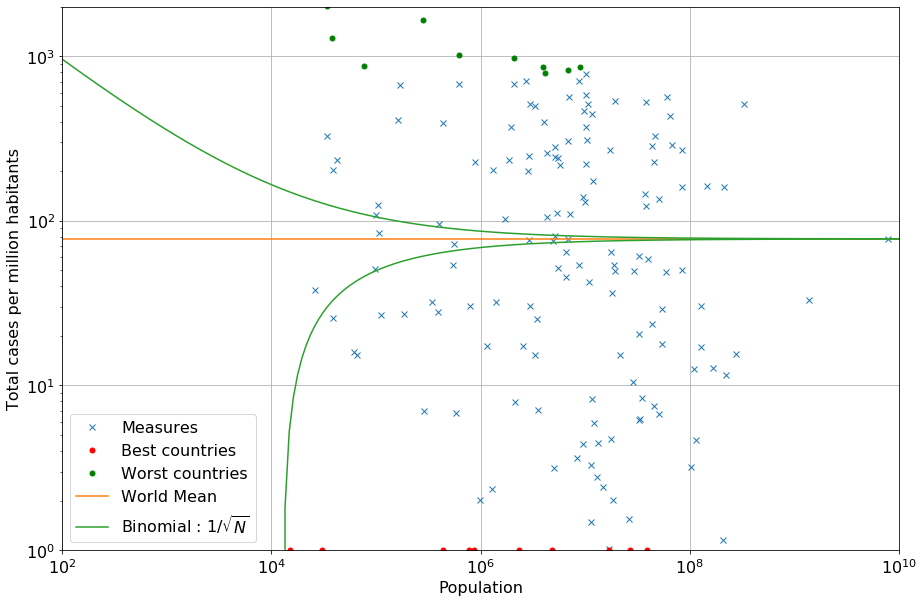

In [5]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})


def compute_std_N(val, mean):
    proba = mean/1e6
    print(proba * (1-proba))
    return 1e6*np.sqrt(1/val*proba *(1-proba))
    

max_val = 10e9
mean = (sorted_case*sorted_population).mean()/sorted_population.sum()
mean = total_cases["World"]
fig, ax = plt.subplots(figsize=(15,10))
ax.loglog(sorted_population[10:-10],sorted_case[10:-10], 'x')
ax.loglog(sorted_population[:10],sorted_case[:10]+1, ".", color="red", markersize=10 )
ax.loglog(sorted_population[-10:],sorted_case[-10:]+1, ".",color="green", markersize=10 )
ax.loglog([100,100000,1e6,max_val], [mean,mean,mean, mean])


th_x = np.logspace(2, np.log10(max_val), 200)
std = compute_std_N(th_x, mean)
th_y = total_cases["World"]+std
th_y_under = total_cases["World"] -std

ax.loglog(th_x,th_y, color="C2")
ax.loglog(th_x,th_y_under, color="C2",)

ax.set_xlim([100, max_val])
ax.set_ylim([1, 2000])



ax.set_xlabel("Population")
ax.set_ylabel("Total cases per million habitants")

ax.grid()

ax.legend(["Measures", "Best countries", "Worst countries", "World Mean", "Binomial : $1/ \sqrt{N}$"])


## Mathematical digression

### Binomial distribution

Let's assume that all population is throwing a coin with a proba $p = \text{mean infection of the world}$ to be infected. 

for a country of size $N$, we expect to have $B(N,p)$ cases, with $\mathbb{E}[B] = Np$ and $\text{Var}(B) = N p (1-p)$

Consider the rescaled random variable $\frac{\alpha B }{N}$. This variable has a mean given by $\mathbb{E}[\frac{\alpha B }{N}] = \alpha p$ and a variance $\text{Var}(\frac{\alpha B }{N}) = \frac{\alpha^2}{N^2}Np(1-p) = \frac{\alpha^2}{N}p(1-p)$

and a standard deviation $\sigma = \sqrt{\text{Var}(\frac{\alpha B }{N})} = \alpha\sqrt{\frac{p(1-p)}{N}}$ 

empirical estimation $p = ~  5e-5$,$\alpha = 1e6$ for $N = 1e7$ $\sigma = 5$


### Poisson distribution

Let's assume that the contamination does not depend of previous contamination happening in a country (which is the opposite than the epidemic)

Split the countries in groups of $1e6$ habitants. Let's call $P$ the random variable with a Poisson distribution of parameters $\lambda = \text{mean infection of the world}$ per habitants. The sum of two poisson variables with parameters $\lambda$ is a poisson random variable with parameters $2\lambda$. 

Hence for a country of pop. $N$ the number of case cas be simulated by a Poisson variable $P_N$ of parameters $N\lambda$ with $\text{mean} = \text{var} = N\lambda $.

consider the rescaled random variable $\frac{\alpha P_N}{N} $ this variable has a mean given by $\mathbb{E}[\frac{\alpha P_N}{N}] = \alpha\lambda$ and a variance $\text{Var}(\frac{\alpha P_N }{N}) = \frac{\alpha^2}{N^2}N \lambda  = \frac{\alpha^2}{N} \lambda $


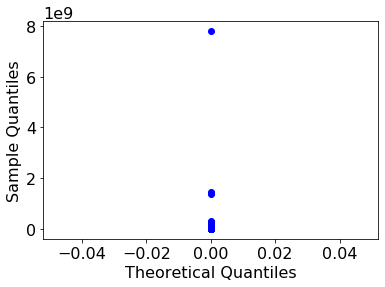

In [10]:
import statsmodels.api as sm 
import pylab as py 
import scipy.stats as stats

fig = sm.qqplot(sorted_population,stats.poisson(total_cases["World"]/1e6))
